In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


# Discover the data

In [2]:
df_students_mh = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv") 
df_students_mh.tail(5)
#cgpa Cumulative Grade Point Average A is 4.0 /B is 3.0 /C is 2.0. 

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [3]:
df_students_mh.shape

(101, 11)

In [4]:
#i dont like the columns names i will change it
new_column_names = ['TimeStamp','Gender', 'Age', 'Course', 'YearStudy', 'CGPA', 'MaritalStatus', 
                    'Depression', 'Anxiety', 'PanicAttack', 'TreatmentSpecialist']

df_students_mh.columns = new_column_names
df_students_mh

,TimeStamp,Gender,Age,Course,YearStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,TreatmentSpecialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [5]:
df_students_mh.describe()
#we have 100 data of age ,std the data dispertion look close to the mean .

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [6]:
df_students_mh.info()
#its look like we have a missing value on age 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TimeStamp            101 non-null    object 
 1   Gender               101 non-null    object 
 2   Age                  100 non-null    float64
 3   Course               101 non-null    object 
 4   YearStudy            101 non-null    object 
 5   CGPA                 101 non-null    object 
 6   MaritalStatus        101 non-null    object 
 7   Depression           101 non-null    object 
 8   Anxiety              101 non-null    object 
 9   PanicAttack          101 non-null    object 
 10  TreatmentSpecialist  101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [7]:
df_students_mh.Age.unique()

array([18., 21., 19., 22., 23., 20., 24., nan])

In [8]:
df_students_mh.isna().sum()


TimeStamp              0
Gender                 0
Age                    1
Course                 0
YearStudy              0
CGPA                   0
MaritalStatus          0
Depression             0
Anxiety                0
PanicAttack            0
TreatmentSpecialist    0
dtype: int64

In [9]:
condition_nan = df_students_mh['Age'].isna()
nan_row_age = df_students_mh[condition_nan]
nan_row_age
#just want to check the row of the missing value

,TimeStamp,Gender,Age,Course,YearStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,TreatmentSpecialist
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [10]:
median_age  = df_students_mh.Age.median()
df_students_mh['Age'].fillna(median_age, inplace=True)
df_students_mh.isna().sum()
#perfect we fill the na

TimeStamp              0
Gender                 0
Age                    0
Course                 0
YearStudy              0
CGPA                   0
MaritalStatus          0
Depression             0
Anxiety                0
PanicAttack            0
TreatmentSpecialist    0
dtype: int64

In [11]:
df_students_mh["YearStudy"].unique()

#thats a kind of problem we have duplicated years because of syntaxe lets deal with that

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [12]:
#lower every string so they will have the same syntaxe
df_students_mh['YearStudy'] = df_students_mh['YearStudy'].str.lower()
df_students_mh["YearStudy"].unique()
#perfect

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [13]:
df_students_mh["CGPA"].unique()
#there is duplicated value '3.50 - 4.00' i can see a space on the end 

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [14]:
#so i will remove the space in the end by using rstrip
df_students_mh['CGPA'] = df_students_mh['CGPA'].str.rstrip()
df_students_mh["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

# let's do some visualisation

In [15]:
#i want to see CGPA students
value_counts = df_students_mh['CGPA'].value_counts()
value_counts

CGPA
3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: count, dtype: int64

In [16]:
#i want to sort the index wich is the cgpa
value_counts_sorted = value_counts.sort_index()
print(f"index : ${value_counts_sorted.index} \n value : ${value_counts_sorted.values}")
#perfect

index : $Index(['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00'], dtype='object', name='CGPA') 
 value : $[ 4  2  4 43 48]


([0, 1, 2, 3, 4],
 [Text(0, 0, '0 - 1.99'),
  Text(1, 0, '2.00 - 2.49'),
  Text(2, 0, '2.50 - 2.99'),
  Text(3, 0, '3.00 - 3.49'),
  Text(4, 0, '3.50 - 4.00')])

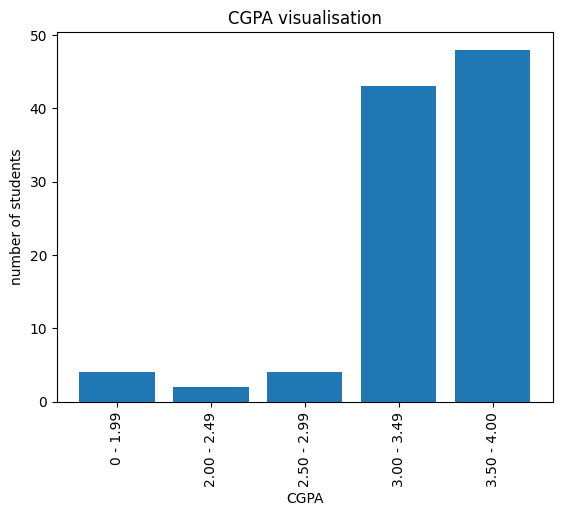

In [17]:
#the plot 
plt.bar(value_counts_sorted.index, value_counts_sorted.values)
plt.xlabel('CGPA')
plt.ylabel('number of students')
plt.title('CGPA visualisation')
plt.xticks(rotation=90)  


In [18]:
df_students_mh.head(1)

,TimeStamp,Gender,Age,Course,YearStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,TreatmentSpecialist
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [19]:
# i want to see the pourcentage of depresive people depending on there cgpa that equal too 3.50 - 4.00
#i will filter the 3.50 - 4.00 cgpa
best_students_cgpa = df_students_mh[df_students_mh.CGPA=='3.50 - 4.00']
best_students_cgpa.head(5)
#we had the data 


,TimeStamp,Gender,Age,Course,YearStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,TreatmentSpecialist
5,8/7/2020 12:31,Male,19.0,Engineering,year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No
10,8/7/2020 12:39,Female,20.0,Psychology,year 1,3.50 - 4.00,No,No,No,No,No


In [20]:

grouped_data = best_students_cgpa.groupby(['CGPA', 'Depression']).size().reset_index(name='count')
grouped_data

,CGPA,Depression,count
0,3.50 - 4.00,No,35
1,3.50 - 4.00,Yes,13


Text(0.5, 1.0, 'pourcentage of depression people having a good cpga')

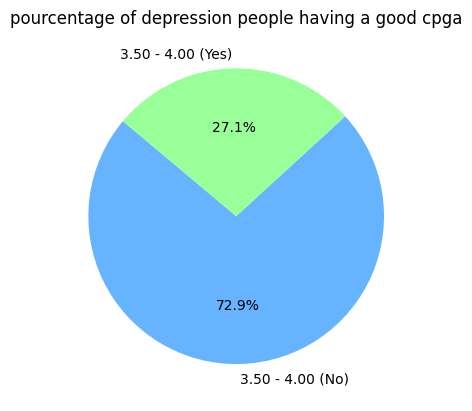

In [21]:
plt.pie(grouped_data['count'], labels=grouped_data['CGPA'] + ' (' + grouped_data['Depression'] + ')', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title("pourcentage of depression people having a good cpga")

In [22]:
#who is the more depressive gender
depression_count_gender = df_students_mh[df_students_mh['Depression'] == 'Yes'].groupby('Gender').size().reset_index(name='Depressed')
depression_count_gender

,Gender,Depressed
0,Female,29
1,Male,6


Text(0.5, 1.0, 'most depressed student Gender')

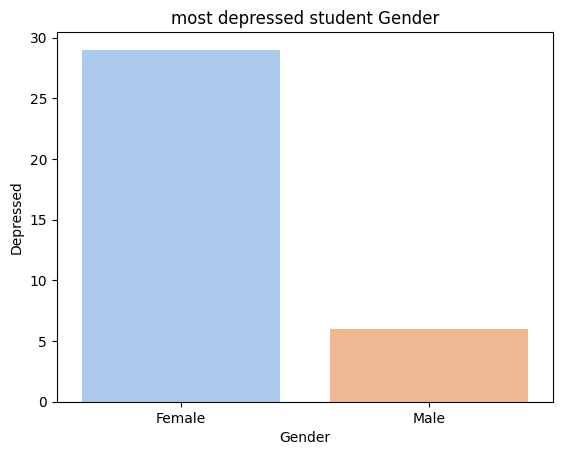

In [23]:
sns.barplot(data=depression_count_gender, x='Gender', y='Depressed', palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Depressed')
plt.title('most depressed student Gender')

In [24]:
#who is the more depressive students depending on there courses
df_students_mh.Course.value_counts()

Course
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

In [25]:

depression_count_course = df_students_mh[df_students_mh['Depression'] == 'Yes'].groupby('Course').size().reset_index(name='Depressed')
depression_count_course

,Course,Depressed
0,ALA,1
1,BCS,5
2,BENL,2
3,BIT,5
4,Communication,1
5,ENM,1
6,Econs,1
7,Engineering,7
8,KOE,1
9,Law,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ALA'),
  Text(1, 0, 'BCS'),
  Text(2, 0, 'BENL'),
  Text(3, 0, 'BIT'),
  Text(4, 0, 'Communication '),
  Text(5, 0, 'ENM'),
  Text(6, 0, 'Econs'),
  Text(7, 0, 'Engineering'),
  Text(8, 0, 'KOE'),
  Text(9, 0, 'Law'),
  Text(10, 0, 'Laws'),
  Text(11, 0, 'MHSC'),
  Text(12, 0, 'Malcom'),
  Text(13, 0, 'Marine science'),
  Text(14, 0, 'Nursing '),
  Text(15, 0, 'Pendidikan islam'),
  Text(16, 0, 'Usuluddin '),
  Text(17, 0, 'koe'),
  Text(18, 0, 'psychology')])

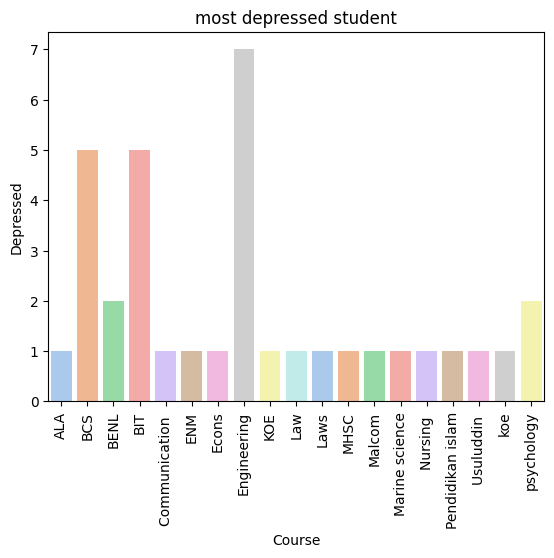

In [26]:
sns.barplot(data=depression_count_course, x='Course', y='Depressed', palette='pastel')
plt.xlabel('Course')
plt.ylabel('Depressed')
plt.title('most depressed student')
plt.xticks(rotation=90)  